## CGLMP NN

This is the truth-level NN codes gor Bell Study. Modify from Siang-Yuan's notebook.

> Author : Y.Y. Gary Peng, S.Y. Lin  
> Istitute: National Tsing Hua University, Taiwan and ATLAS experiment, CERN  
> License : MIT  
> Data : Aug. 03, 2023  
> Email : yuan-yen.peng@cern.ch

Version : 5.0


In [211]:
%reset -f

In [212]:
import os
import gc
import glob
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from numba import njit
import matplotlib.pyplot as plt

In [213]:
def get_files_names(path):
    files_name = glob.glob(path)
    return files_name

path = "./truth/*/*.npz"
files_name = get_files_names(path)
print(files_name)

def get_data(path):
    try:
        with np.load(path, allow_pickle=True) as f:
            data_dict = {name: f[name] for name in f.files}
            return pd.DataFrame(data_dict)
    except FileNotFoundError:
        print("File not found!")
        return pd.DataFrame()
    
files = []
files_name.sort()
for f in files_name:
    files.append(get_data(f))
    
# need to check the order of data name.
print(files_name)

# need to follow the order of data name.
(
    CGLMP,
    Higgs,
    LeadLep,
    LepM,
    LepP,
    NuM,
    NuP,
    MET,
    Wm,
    Wp,
    diLep,
    SubLep,
    Xi,
) = files
GEV=1e3

del files_name, files
gc.collect()

['./truth/archive/LeptonP.npz', './truth/archive/subLeadLepton.npz', './truth/archive/CGLMP.npz', './truth/archive/xi_xyz.npz', './truth/archive/diLepton.npz', './truth/archive/LeadLepton.npz', './truth/archive/MET.npz', './truth/archive/Higgs.npz', './truth/archive/WmBoson.npz', './truth/archive/LpNu.npz', './truth/archive/LmNu.npz', './truth/archive/LeptonM.npz', './truth/archive/WpBoson.npz']
['./truth/archive/CGLMP.npz', './truth/archive/Higgs.npz', './truth/archive/LeadLepton.npz', './truth/archive/LeptonM.npz', './truth/archive/LeptonP.npz', './truth/archive/LmNu.npz', './truth/archive/LpNu.npz', './truth/archive/MET.npz', './truth/archive/WmBoson.npz', './truth/archive/WpBoson.npz', './truth/archive/diLepton.npz', './truth/archive/subLeadLepton.npz', './truth/archive/xi_xyz.npz']


231

In [214]:
# Some constants
GEV = 1e3
# RMV_EVT = [638488, 835579, 2168342] # escape some mathmetical errors.
RMV_EVT = [] # escape some mathmetical errors.

In [215]:
# # DiNu info.
# DUNI_M = 34.141
# dinu_kin = pd.DataFrame({
#     'lep_p_M' : DUNI_M,
#     'lep_p_px': MET['px'],
#     'lep_p_py': MET['py'],
#     'lep_p_pz': diNu_pz,
# })

# # check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
# print(dinu_kin.shape)
# dinu_kin.drop(RMV_EVT, inplace=True)
# print(dinu_kin.shape)
# dinu_kin.head(5)

In [216]:
# Kinemetic info of leptons.
lep_kin = pd.DataFrame({
    'lep_p_E' : LepP['E'],
    'lep_p_px': LepP['px'],
    'lep_p_py': LepP['py'],
    'lep_p_pz': LepP['pz'],
    'lep_m_E' : LepM['E'],
    'lep_m_px': LepM['px'],
    'lep_m_py': LepM['py'],
    'lep_m_pz': LepM['pz'],
})/GEV

# check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
print(lep_kin.shape)
lep_kin.drop(RMV_EVT, inplace=True)
print(lep_kin.shape)
lep_kin.head(5)

(2928862, 8)
(2928862, 8)


,lep_p_E,lep_p_px,lep_p_py,lep_p_pz,lep_m_E,lep_m_px,lep_m_py,lep_m_pz
0,19.465703,-5.065763,16.360542,-9.250574,12.031222,11.081455,2.673936,-3.847299
1,131.817141,8.901175,2.966260,131.482766,66.401992,-13.096559,14.755815,63.403242
2,94.193734,-3.040100,49.431305,80.123430,26.267500,7.589698,1.677931,25.090863
3,165.226891,4.702402,-19.638676,163.988219,36.290188,0.038865,20.284725,30.091441
4,6.403636,5.808921,-2.135702,-1.643704,32.603137,11.729594,30.418752,0.263776


In [217]:
# Kinemetic info of neutirnos.
nu_kin = pd.DataFrame({
    'nu_p_E' : NuP['E'],
    'nu_p_px': NuP['px'],
    'nu_p_py': NuP['py'],
    'nu_p_pz': NuP['pz'],
    'nu_m_E' : NuM['E'],
    'nu_m_px': NuM['px'],
    'nu_m_py': NuM['py'],
    'nu_m_pz': NuM['pz'],
})/GEV

# check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
print(nu_kin.shape)
nu_kin.drop(RMV_EVT, inplace=True)
print(nu_kin.shape)
nu_kin.head(5)

(2928862, 8)
(2928862, 8)


,nu_p_E,nu_p_px,nu_p_py,nu_p_pz,nu_m_E,nu_m_px,nu_m_py,nu_m_pz
0,75.449547,-5.933027,30.212092,68.881516,46.680430,27.464617,28.449271,24.807184
1,226.696359,59.309223,-25.300893,217.332734,384.335750,83.522359,-10.934743,374.991219
2,8.372312,-7.214337,-4.222511,-0.468329,66.342891,3.095675,-48.527266,45.132035
3,10.764710,-1.976395,-5.639073,-8.953977,30.333172,-17.860195,-11.609113,21.594980
4,71.970891,-19.597881,-10.960046,68.378430,82.460156,-2.266198,-15.764699,80.907453


In [218]:
# CGLMP.
CGLMP = pd.DataFrame({
    'Bxy' : CGLMP['Bxy'],
    'Byz' : CGLMP['Byz'],
    'Bzx' : CGLMP['Bzx'],
})

# check
print(CGLMP.shape)
CGLMP.drop(RMV_EVT, inplace=True)
print(CGLMP.shape)
CGLMP.head(5)

(2928862, 3)
(2928862, 3)


,Bxy,Byz,Bzx
0,5.379610,-0.375224,8.00803
1,-4.331580,15.150000,-5.99553
2,4.612100,21.715400,19.46050
3,-12.159800,-1.537670,-5.16628
4,-0.905081,24.782200,6.81644


## The CGLMP expectation value:

\begin{align*}
\mathrm{tr}(\rho \mathcal{B}_\text{CGLMP}^{xy})
= \frac{8}{ \sqrt{3} } & \langle \xi_x^+\xi_x^- + \xi_x^+\xi_x^- \rangle \\
+ 25 & \langle [{\xi_x^+}^2 - {\xi_y^+}^2][{\xi_x^-}^2 - {\xi_y^-}^2] \rangle \\
+ 100 & \langle \xi_x^+ \xi_y^+ \xi_x^- \xi_y^- \rangle
\end{align*}


\begin{equation*}
\mathcal{I}_3 = \mathrm{max}(
\langle \mathcal{B}_\text{CGLMP}^{xy} \rangle,
\langle \mathcal{B}_\text{CGLMP}^{yz} \rangle,
\langle \mathcal{B}_\text{CGLMP}^{zx} \rangle )
\end{equation*}


The ensemble of decays has rotational symmetry in the Higgs boson rest frame around the direction of the W boson momenta.  
Hence in this Letter, rather than testing every possible pair of axes 
we **choose a set of Cartesian coordinates**  
in which **one axis is aligned with this privileged direction**,  
**construct expectation values for each** of the $(x, y)$, $(y, z)$ and $(z, x)$ **pairs of axes**,  
and **compare the largest of them**.

## Baseline model: $\mathcal{B}_{*z}$ Regression
Baseline model uses only *low level features*
* Features:
    * four-vector component ($E, p_x, p_y, p_z$)
        * alternate four-vector ($M, p_T, \eta, \phi$)
* Input particles (available four-vectors):
    * Positive/Negative charged leptons
        * leading/sub-leading lepton
    * Di-Lepton system
    * Missing Transverse momentum
        * $p_x$, $p_y$
        * $p_T$, $\phi$

[Visualize neural network](http://alexlenail.me/NN-SVG/index.html)

In [219]:
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
print(tf.config.list_physical_devices())
from tensorflow import keras
from tensorflow.keras import layers
# os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID' # If the line below doesn't work, uncomment this line (make sure to comment the line below); it should help.
print(tf.__version__)

# install lbn
# !pip install lbn --upgrade --quiet
from lbn import LBN, LBNLayer

# install keras tuner
# !pip install keras-tuner --upgrade --quiet
# import keras_tuner as kt

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
2.13.0


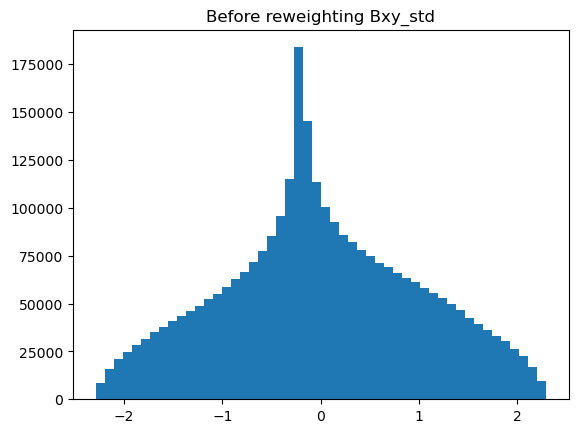

2.299248862698251 -2.292063273788311
std: 1.0000000000000007
2928862
CPU times: user 6.05 s, sys: 7.43 s, total: 13.5 s
Wall time: 4.85 s


In [220]:
%%time

from sklearn.preprocessing import StandardScaler

SCALAR = StandardScaler()
Bxy_std = SCALAR.fit_transform([[x] for x in CGLMP['Bxy']]).flatten() # zero mean and unit variance
plt.hist(Bxy_std, bins=50)
plt.title("Before reweighting Bxy_std")
plt.show()
print(Bxy_std.max(), Bxy_std.min())
print("std:", Bxy_std.std())
print(len(Bxy_std))

In [221]:
# Undersampling to an uniform distribution

n = int(1e2)
step = (Bxy_std.max() - Bxy_std.min())/n
intervals = [Bxy_std.min() + i*step for i in range(n)]

sampling = int(1e3)
indices_arr = np.empty((n-1, sampling), dtype=int)
for i in range(n-1):
    try:
        indices_arr[i] = np.random.choice(np.where((intervals[i]<Bxy_std)*(Bxy_std<=intervals[i+1]))[0], size=sampling, replace=False)
    except ValueError:
        print("Cannot take a larger sample than population when 'replace=False")
        break

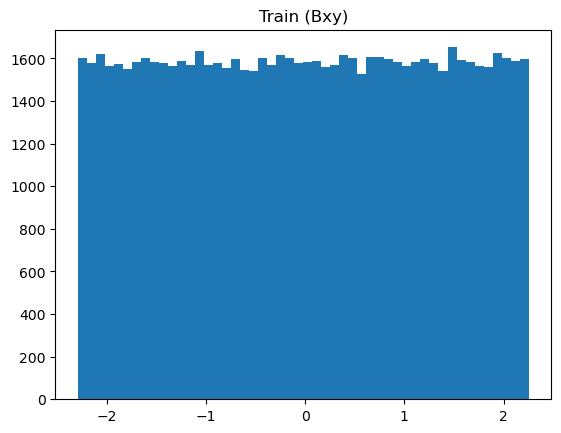

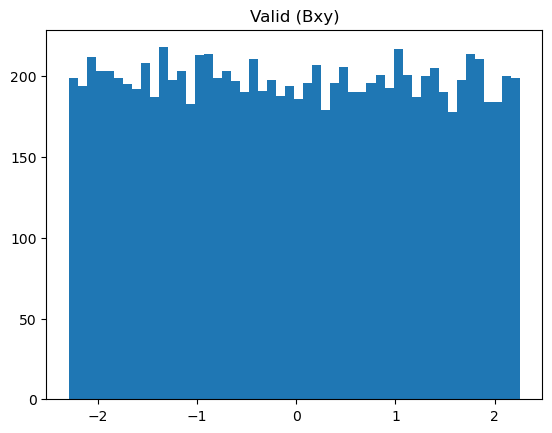

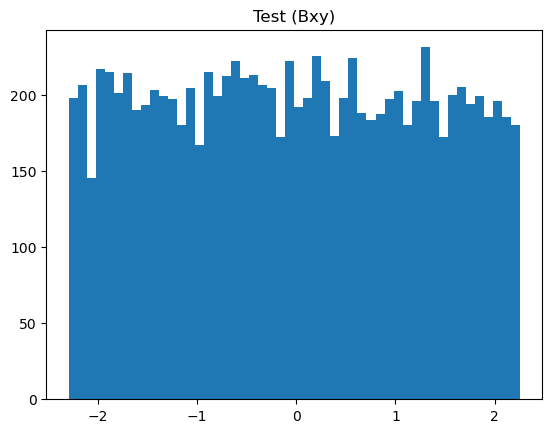

With the same shapes...

Training data shape: (79200, 4, 4)
Testing data shape: (9900, 4, 4)
Validation data shape: (9900, 4, 4)
None


In [222]:
from sklearn.model_selection import train_test_split

lepton_features   = ['lep_p_E','lep_p_px','lep_p_py','lep_p_pz',
                    'lep_m_E','lep_m_px','lep_m_py','lep_m_pz']
neutrino_features = ['nu_p_E','nu_p_px','nu_p_py','nu_p_pz',
                    'nu_m_E','nu_m_px','nu_m_py','nu_m_pz']

def reshape_features(inputs, features):
    outputs = np.stack([inputs[features[0:4]],
                        inputs[features[4:8]]], axis=1)
    return outputs

train_indices, temp_indices = train_test_split(indices_arr.flatten(), train_size=0.8, test_size=0.2, random_state=42)
valid_indices, test_indices = train_test_split(temp_indices, train_size=0.5, test_size=0.5, random_state=42)

lep_train = reshape_features(lep_kin.iloc[train_indices], lepton_features)
lep_valid = reshape_features(lep_kin.iloc[valid_indices], lepton_features)
lep_test  = reshape_features(lep_kin.iloc[test_indices],  lepton_features)

nu_train = reshape_features(nu_kin.iloc[train_indices], neutrino_features)
nu_valid = reshape_features(nu_kin.iloc[valid_indices], neutrino_features)
nu_test  = reshape_features(nu_kin.iloc[test_indices],  neutrino_features)

Bxy_train = Bxy_std[train_indices]
Bxy_valid = Bxy_std[valid_indices]
Bxy_test  = Bxy_std[test_indices]
plt.hist(Bxy_train, bins=50)
plt.title("Train (Bxy)")
plt.show()
plt.hist(Bxy_valid, bins=50)
plt.title("Valid (Bxy)")
plt.show()
plt.hist(Bxy_test, bins=50)
plt.title("Test (Bxy)")
plt.show()

def stack_parts(input1, input2):
    outputs = np.concatenate([input1, input2], axis=1)
    return outputs

if (lep_train.shape == nu_train.shape and 
    lep_test.shape  == nu_test.shape and 
    lep_valid.shape == nu_valid.shape):
    print('With the same shapes...\n')
    # print(f'Training data shape: {lep_train.shape}\nTesting data shape: {lep_test.shape}\nValidation data shape: {lep_valid.shape}')
    train = stack_parts(lep_train, nu_train)
    valid = stack_parts(lep_valid, nu_valid)
    test  = stack_parts(lep_test , nu_test)

    print(print(f'Training data shape: {train.shape}\nTesting data shape: {test.shape}\nValidation data shape: {valid.shape}'))
    
    del (train_indices, temp_indices, valid_indices, test_indices,
        lep_train, lep_valid, lep_test,
        nu_train, nu_valid, nu_test)
    gc.collect()
    
else:
    print('The shape of leptons are NOT the same with neutrinos shape...\n')
    print(f'Training data shape: {lep_train.shape}, {nu_train.shape}\nTesting data shape: {lep_test.shape}, {nu_test.shape}\nValidation data shape: {lep_valid.shape}, {nu_valid.shape}')

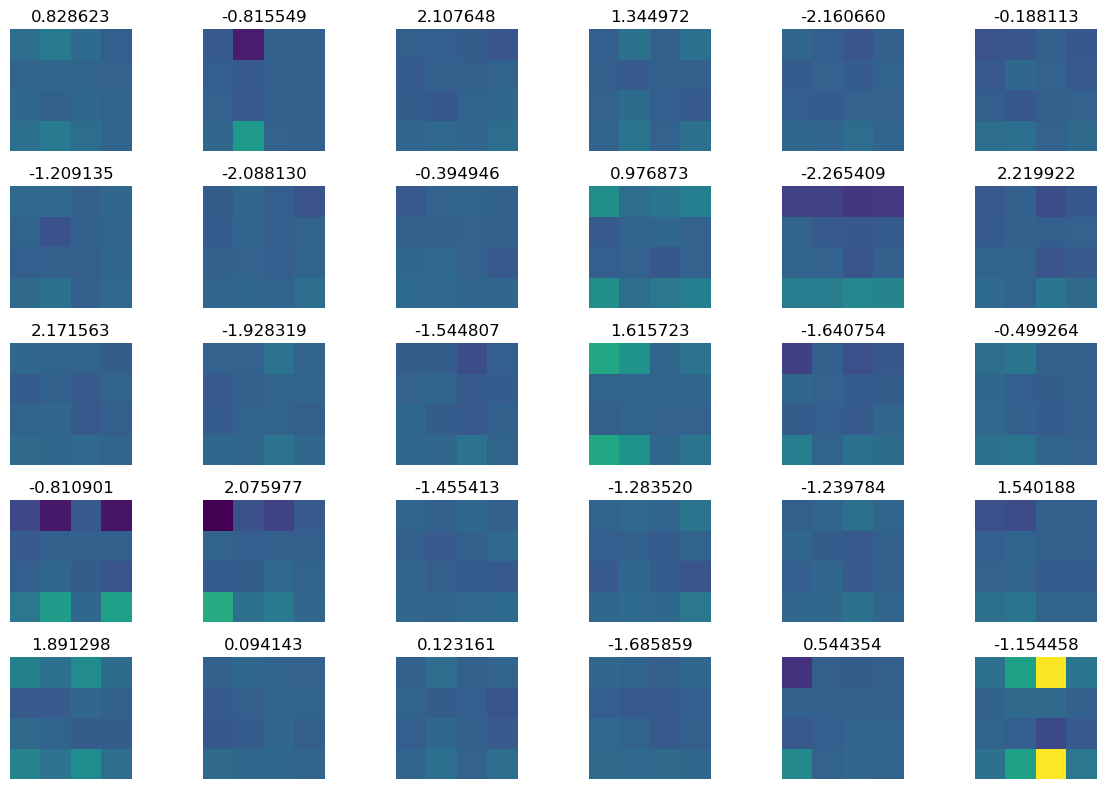

In [223]:
# Create random data for 50 figures (4x4 matrices)
num_figures = 30
figure_size = 4

# Calculate the grid dimensions (rows x columns)
num_rows = 5
num_cols = 6

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the figures and plot them on subplots
for i, ax in enumerate(axes):
    ax.imshow(train[i].T, cmap='viridis', origin='lower', vmin=train[0:num_figures+1].min(), vmax=train[0:num_figures+1].max())
    ax.set_title(f'{Bxy_train[i]:2f}')
    ax.axis('off')  # Turn off axis labels
plt.tight_layout()
plt.show()

### Model define

In [224]:
# train = np.concatenate((train, valid), axis=0)
# Bxy_train = np.concatenate((Bxy_train, Bxy_valid), axis=0)
# del valid, Bxy_valid

In [234]:
# define model 
model = keras.models.Sequential()

# LBN layer
input_shape    = (4,4) # 4 particles, 16 vector components
N_combinations = 16      # number of composite particles/rest frames
model.add(LBNLayer(input_shape, N_combinations, boost_mode=LBN.PAIRS))

# Simple DNN hidden layers
model.add(layers.Dense(units=64, activation='elu'))
model.add(layers.Dense(units=64, activation='elu'))

# Last dense layer
model.add(layers.Dense(units=1, activation='linear'))

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LBN (LBNLayer)              (None, 64)                128       
                                                                 
 dense_100 (Dense)           (None, 64)                4160      
                                                                 
 dense_101 (Dense)           (None, 64)                4160      
                                                                 
 dense_102 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8513 (33.25 KB)
Trainable params: 8513 (33.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
# def model_define(hp):
#     # inputs
#     inputs = keras.Input(shape=(4,4)) # 4 particles and each particle has 4 components
    
#     # LBN layer
#     input_shape    = (4,16) # 4 particles, 16 vector components
#     N_combinations = 3      # number of composite particles/rest frames
#     x = LBNLayer(input_shape, N_combinations, boost_mode=LBN.PAIRS)(inputs)
    
#     # Keras tuner layers
#     hp_units_1 = hp.Int('units_1', min_value=4, max_value=64, step=4)
#     hp_units_2 = hp.Int('units_2', min_value=4, max_value=64, step=4)
#     hp_units_3 = hp.Int('units_3', min_value=4, max_value=64, step=4)
#     hp_act_1   = hp.Choice('activation_1', values=['relu', 'elu'])
#     x = layers.Dense(units=hp_units_1, activation=hp_act_1, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01))(x)
#     x = layers.Dropout(0.2)(x)
#     x = layers.Dense(units=hp_units_2, activation=hp_act_1, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01))(x)
#     x = layers.Dropout(0.2)(x)
#     x = layers.Dense(units=hp_units_3, activation=hp_act_1, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01))(x)
#     x = layers.Dropout(0.2)(x)
    
#     # Last dense layer
#     hp_act_2 = hp.Choice('activation_2', values=['linear'])
#     outputs  = layers.Dense(units=1, activation=hp_act_2)(x)
#     model    = keras.Model(inputs, outputs, name='KerasTuner')
    
#     return model

# def model_builder(hp):
#     model = model_define(hp)
#     # Keras tuner for learning rate
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-6, 1e-5, 1e-4, 1e-3])
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mse')

#     return model

# tuner = kt.Hyperband(model_builder,
#                     objective='val_loss',
#                     max_epochs=10,
#                     factor=3,
#                     directory='./KerasTuner',
#                     project_name='KerasTuner_model')
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                             min_delta=0.01,
#                                             patience=5,
#                                             mode='auto',
#                                             baseline=None,
#                                             restore_best_weights=False)
# tuner.search(train, Bxy_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f'''
# The hyperparameter search is complete...\n
# The optimal number of units in the three densely-connected layers are {best_hps.get('units_1')}, {best_hps.get('units_2')}, {best_hps.get('units_3')} and 
# the optimal learning rate for the optimizer is {best_hps.get('learning_rate')} and 
# the optimal activation function for the optimizer is {best_hps.get('activation_1')}, last layer's activation is {best_hps.get('activation_2')}.
# ''')

In [236]:
# Fit the model
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            min_delta=0.0001,
                                            patience=10,
                                            mode='auto',
                                            baseline=None,
                                            restore_best_weights=False)
history = model.fit(
    x=train, 
    y=Bxy_train, 
    validation_data=(valid, Bxy_valid), 
    epochs=100, 
    batch_size=256, 
    callbacks=stop_early
)
print("\nFinish!")

Epoch 1/100
310/310 [==============================] - 3s 6ms/step - loss: 1.5088 - val_loss: 1.0700
Epoch 2/100
310/310 [==============================] - 2s 6ms/step - loss: 0.9956 - val_loss: 0.9059
Epoch 3/100
310/310 [==============================] - 2s 6ms/step - loss: 0.8472 - val_loss: 0.7919
Epoch 4/100
310/310 [==============================] - 2s 6ms/step - loss: 0.7410 - val_loss: 0.7147
Epoch 5/100
310/310 [==============================] - 2s 6ms/step - loss: 0.6806 - val_loss: 0.6653
Epoch 6/100
310/310 [==============================] - 2s 6ms/step - loss: 0.6309 - val_loss: 0.6609
Epoch 7/100
310/310 [==============================] - 2s 6ms/step - loss: 0.5854 - val_loss: 0.6091
Epoch 8/100
310/310 [==============================] - 2s 6ms/step - loss: 0.5437 - val_loss: 0.5421
Epoch 9/100
310/310 [==============================] - 2s 6ms/step - loss: 0.5047 - val_loss: 0.4799
Epoch 10/100
310/310 [==============================] - 2s 6ms/step - loss: 0.4529 - val_lo

In [239]:
Bxy_pred = model.predict(test)

310/310 [==============================] - 1s 2ms/step


RMSE: 0.2177996218211674
MAX of pred: 7.209770679473877; MIN of pred: -2.5862953662872314
MAX of test: 2.2523324756752645; MIN of test: -2.288287813459208


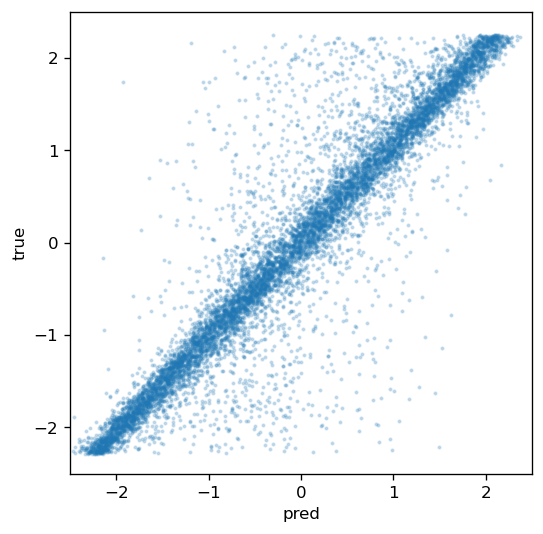

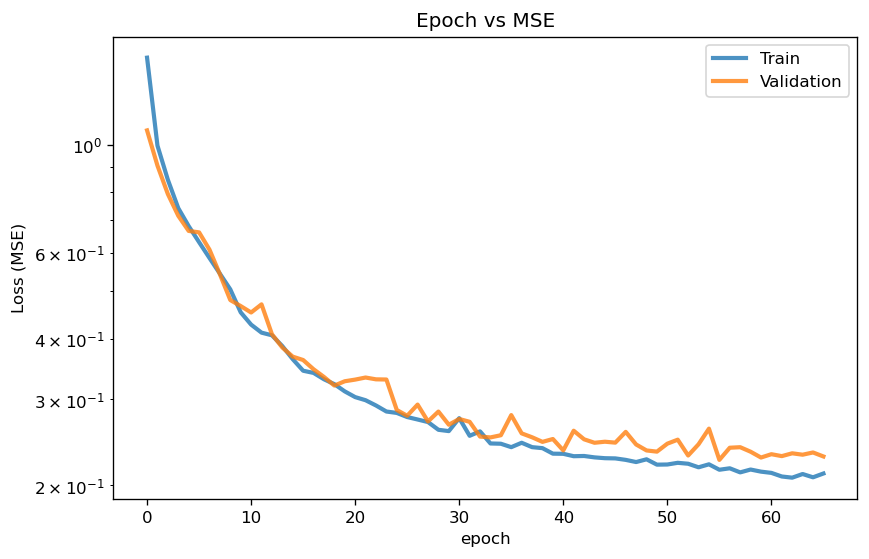

In [240]:
from sklearn.metrics import mean_squared_error

print(f'''RMSE: {mean_squared_error(Bxy_test, Bxy_pred)}
MAX of pred: {Bxy_pred.max()}; MIN of pred: {Bxy_pred.min()}
MAX of test: {Bxy_test.max()}; MIN of test: {Bxy_test.min()}''')

# Plot the results
fig = plt.figure(figsize=(5,5), dpi=120)
ax = fig.add_subplot()
plt.plot(Bxy_pred, Bxy_test, '.', color="tab:blue", alpha=.2, markersize=3)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.xlabel('pred')
plt.ylabel('true')
ax.set_aspect('equal', adjustable='box')
plt.show() 
plt.close()

fig = plt.figure(figsize=(8,5), dpi=120)
plt.plot(history.history['loss'], lw=2.5, label='Train', alpha=.8)
plt.plot(history.history['val_loss'], lw=2.5, label='Validation', alpha=.8)
plt.semilogy()
plt.title('Epoch vs MSE')
plt.xlabel('epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='best')
plt.show()
plt.close()

29.6186 -25.1056
std: 11.919078406223935
mean: 2.2136772085042526
2928862


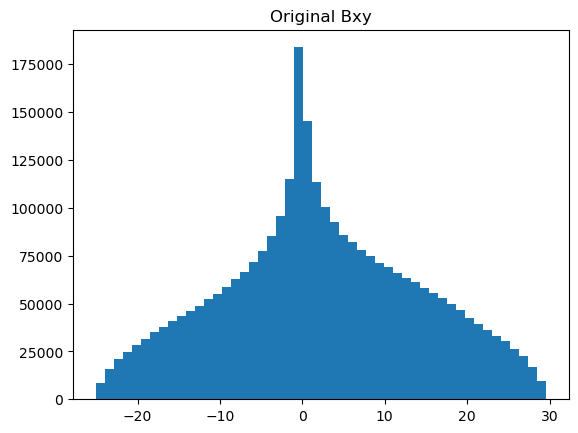

125061.046875 124938.953125
std: 8.749001013541978
mean: 125000.00467228446
2928862


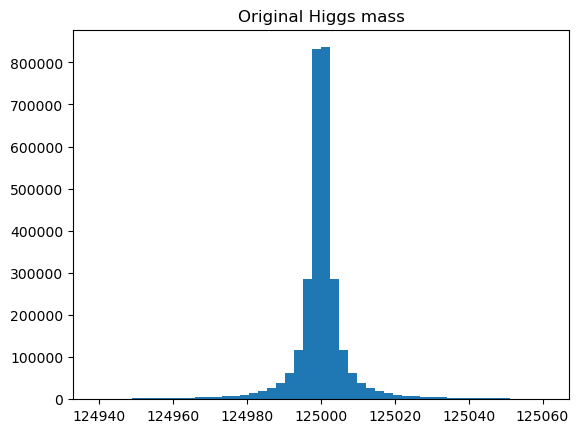

In [247]:

plt.hist(CGLMP['Bxy'], bins=50)
plt.title("Original Bxy")
print(CGLMP['Bxy'].max(), CGLMP['Bxy'].min())
print("std:", CGLMP['Bxy'].std())
print("mean:", CGLMP['Bxy'].mean())
print(len(CGLMP['Bxy']))
plt.show()

plt.hist(Higgs['m'], bins=50)
plt.title("Original Higgs mass")
print(Higgs['m'].max(), (Higgs['m'].min()))
print("std:", (Higgs['m'].std()))
print("mean:", (Higgs['m'].mean()))
print(len((Higgs['m'])))